# Dependeces for cyber nano

In [1]:
import os
import time
from  GPS_VK2828U7G5LF import init_gps_GPRMC,read_gps
from mpu6050 import mpu6050
import ADS1115
import board
import busio
import Jetson.GPIO as GPIO
import sys
import cv2
from IPython import display

sys.path.append('/opt/nvidia/jetson-gpio/lib/python')
sys.path.append('/opt/nvidia/jetson-gpio/lib/python/Jetson/GPIO')

from pca9685_driver import Device

# Accelerometer data

In [3]:
#!/usr/bin/env python
"""Released under the MIT License
Copyright 2015, 2016 MrTijn/Tijndagamer
"""

from mpu6050 import mpu6050
from time import sleep

sensor = mpu6050(0x68)

#while True:
accel_data = sensor.get_accel_data()
gyro_data = sensor.get_gyro_data()
temp = sensor.get_temp()

print("Accelerometer data")
print("x: " + str(accel_data['x']))
print("y: " + str(accel_data['y']))
print("z: " + str(accel_data['z']))

print("Gyroscope data")
print("x: " + str(gyro_data['x']))
print("y: " + str(gyro_data['y']))
print("z: " + str(gyro_data['z']))

print("Temp: " + str(temp) + " C")
sleep(0.1)
    

Accelerometer data
x: 0.40940848388671874
y: -0.3016694091796875
z: 9.967061511230469
Gyroscope data
x: -0.061068702290076333
y: 1.5190839694656488
z: -0.5114503816793893
Temp: 42.55352941176471 C


# ADC

In [4]:
import ADS1115
import time

ads = ADS1115.ADS1115()

#while True:
volt = ads.readADCSingleEnded()

print("{:.0f} mV mesuré sur AN0".format(volt))

time.sleep(0.1)

2403 mV mesuré sur AN0


# GPS

In [5]:
from  GPS_VK2828U7G5LF import init_gps_GPRMC,read_gps,read_velocity

init_gps_GPRMC()
#read_gps()
print("GPS:{}\n".format(read_gps()))


GPS:$GPRMC,,V,,,,,,,,,,N*53




In [2]:
import time
import serial
from  GPS_VK2828U7G5LF import init_gps_GPRMC,read_gps,read_velocity

In [3]:
init_gps_GPRMC()

In [4]:
print("GPS:{}\n".format(read_gps()))

GPS:0



# Cyber_mind

In [10]:
import os
import time
from  GPS_VK2828U7G5LF import init_gps_GPRMC,read_gps
from mpu6050 import mpu6050
import ADS1115
import board
import busio
import Jetson.GPIO as GPIO
import sys
import cv2
from IPython import display

sys.path.append('/opt/nvidia/jetson-gpio/lib/python')
sys.path.append('/opt/nvidia/jetson-gpio/lib/python/Jetson/GPIO')

from pca9685_driver import Device

In [ ]:
servo = Device(0x40,1)

init_gps_GPRMC()
imu = mpu6050(0x68)

aceleracao_max = 0
desaceleracao_max = 0

ads = ADS1115.ADS1115()

gstreamer = 'nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink'

cam = cv2.VideoCapture(gstreamer)

while True:
    start = time.time()
    print("GPS:{}\n".format(read_gps()))
    print("imu")
    aceleracao_data = imu.get_accel_data()
    aceleracao_instantanea = aceleracao_data['y']
    print("aceleracao longitudinal instantanea : {:.3f} m/s^2\n".format(aceleracao_instantanea))
    if aceleracao_data['y']>aceleracao_max:
        aceleracao_max = aceleracao_data['y']
    print("aceleracao longitudinal maxima: {:.3f} m/s^2\n".format(aceleracao_max))
    if aceleracao_data['y']<desaceleracao_max:
        desaceleracao_max = aceleracao_data['y']
    print("desaceleração longitudinal maxima: {:.3f} m/s^2\n".format(desaceleracao_max))
    volt0 = 3*(ads.readADCSingleEnded()/1000)
    volt1 = (((ads.readADCSingleEnded(1)/1000)/0.185)-7.07415)*1.8
    volt2 = (((ads.readADCSingleEnded(2)/1000)/0.185)-7.1175)*2.115
    print("Tensão da bateria: {:.3f} V\n".format(volt0))
    print("Corrente do motor: {:.3} A\n".format(volt1))
    print("Corrente do computador: {:.3f} A\n".format(volt2))
    lateral = servo.get_pwm(0)
    longitudinal = servo.get_pwm(1)
    print("Controle lateral: {}\n".format(lateral))
    print("Controle longitudinal: {}\n".format(longitudinal))

    ret,frame = cam.read()
    #cv2.imshow('cam',frame)
    print("cam FPS: {}\n ".format(cam.get(cv2.CAP_PROP_FPS)))
    print("cam ret: {}\n ".format(ret))
    if cv2.waitKey(1) == ord('q'):
        break
    print("tempo de leitura dos sensores: {:0.3f} s\n".format(time.time()-start))
    time.sleep(0.5)
    #os.system("clear")#terminal
    display.clear_output(wait=True)#jupyter

cam.release()
cv2.destroyAllWindows()

GPS:$GPRMC,,V,,,,,,,,,,N*53


imu
aceleracao longitudinal instantanea : -0.352 m/s^2

aceleracao longitudinal maxima: 0.000 m/s^2

desaceleração longitudinal maxima: -0.460 m/s^2

Tensão da bateria: 7.086 V

Corrente do motor: 0.0605 A

Corrente do computador: 0.788 A

Controle lateral: 300

Controle longitudinal: 330

cam FPS: 21.0
 
cam ret: True
 
tempo de leitura dos sensores: 0.098 s



# OLED 128x64

In [50]:
from luma.core.interface.serial import i2c, spi, pcf8574
from luma.core.interface.parallel import bitbang_6800
from luma.core.render import canvas
from luma.oled.device import ssd1306, ssd1309, ssd1325, ssd1331, sh1106, ws0010

In [51]:
# rev.1 users set port=0
# substitute spi(device=0, port=0) below if using that interface
# substitute bitbang_6800(RS=7, E=8, PINS=[25,24,23,27]) below if using that interface
serial = i2c(port=1, address=0x3C)

# substitute ssd1331(...) or sh1106(...) below if using that device
device = ssd1306(serial)

In [52]:
with canvas(device) as draw:
    draw.rectangle(device.bounding_box, outline="white", fill="black")
    draw.text((30, 40), "Hello World", fill="white")

# Camera live

In [3]:
import numpy as np
import cv2
from IPython import display
from PIL import Image
import matplotlib.pyplot as py

In [4]:
def showVideo():
    try:
        cap = cv2.VideoCapture('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink')
    except:
        print("Cannot Open Device")
    try:
        ret, frame = cap.read()
        
        while(ret==True):
            ret, frame = cap.read()
            
            if not ret:
                cap.release()
                print ("Released Video Resource")
                break
                
            _,ret_array = cv2.imencode('.jpg', frame) 
            i = display.Image(data=ret_array)
            display.display(i)
            display.clear_output(wait=True)
            
    except KeyboardInterrupt:
        cap.release()
        print("Released Video Resource from KeyboardInterrupt")
    pass
showVideo()

Released Video Resource from KeyboardInterrupt


# Camera shot

In [4]:
import cv2
import numpy as np
from IPython import display

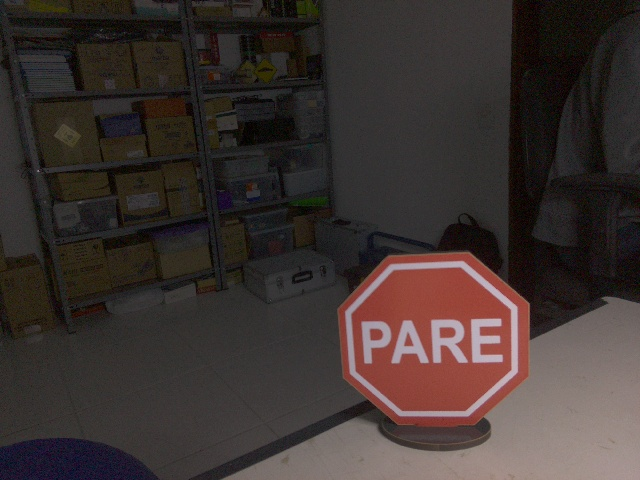

finish


In [49]:
def cap_video(video_index):
    try:
        cap = cv2.VideoCapture(video_index)
    except:
        print("Cannot Open Device")
    ret, frame = cap.read()
    while not ret:
        ret, frame = cap.read()
    _,ret_array = cv2.imencode('.jpg', frame) 
    i = display.Image(data=ret_array)        
    display.display(i)        
    cap.release()
    print("finish")
    
cap_video('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink')

# Get img

In [28]:
import cv2
import numpy as np
from IPython import display
import os
import ipywidgets as widgets

In [29]:
button = widgets.Button(description="save image pare")
output = widgets.Output()

def save_image():
    display.clear_output(wait=True)
    try:
        cap = cv2.VideoCapture('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink')
        print("capture video")
    except:
        print("Cannot Open Device")
    ret, frame = cap.read()
    while not ret:
        ret, frame = cap.read()
        
    ret, frame = cap.read()
    print("frame shape",frame.shape)
    cap.release()
    print("video released")
    os.chdir('/home/nano/jetson_nano/jupyter_notebook/datasets/pare/img')
    print(os.getcwd())
    filename = '1.jpg'
    cv2.imwrite(filename, frame)
    print("After saving image show files:")  
    print(os.listdir())
    print('Successfully saved')
    _,ret_array = cv2.imencode('.jpg', frame) 
    
    frame = display.Image(data=ret_array)
    display.display(frame)
    

def on_button_clicked(b):
    with output:
        save_image()
        print("finished")       

button.on_click(on_button_clicked)
display.display(button,output)

Button(description='save image pare', style=ButtonStyle())

Output()

# Widget button

In [42]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

# OS manipulation

In [53]:
import os

In [54]:
print(os.getcwd())
os.chdir('/home/nano/jetson_nano/jupyter_notebook/datasets/pare/img')
print(os.getcwd())
print(os.listdir())
if os.path.isdir('dir') == True:
    os.rmdir('dir')
if os.path.isdir('dir1/dir2') == True:
    os.removedirs('dir1/dir2')
#os.mkdir('dir')
#os.makedirs('dir1/dir2')

/home/nano/jetson_nano/jupyter_notebook/datasets/pare/img
/home/nano/jetson_nano/jupyter_notebook/datasets/pare/img
['1.jpg']


# Check data

In [58]:
import os

In [67]:
print(os.getcwd())
os.chdir('/home/nano/jetson_nano/jupyter_notebook/datasets/pare/img')
print(os.getcwd())
print(os.listdir())

if os.path.exists('1.jpg'):
    print('yes')
else:
    print('no')

/home/nano/jetson_nano/jupyter_notebook/datasets/pare/img
/home/nano/jetson_nano/jupyter_notebook/datasets/pare/img
[]
no


# Two butons test

In [6]:
import ipywidgets as widgets
from IPython import display
import time

In [7]:
upbutton = widgets.Button(description='Up')
downbutton = widgets.Button(description='Down')
out = widgets.Output()

In [8]:
count = [0]

def up_button_cliked(_, incr=1):
    with out:
        
        display.clear_output(wait=True)
        count[0] += incr
        samp_text = str(incr) + 'count' + str(count)
        print(samp_text)
        
upbutton.on_click(up_button_cliked)
    
def down_button_clicked(_,incr=-1):
    with out:
        display.clear_output(wait=True)
        count[0] += incr
        samp_text = str(incr) + 'count' + str(count)
        print(samp_text)

downbutton.on_click(down_button_clicked)
    
buttons = widgets.HBox([upbutton, downbutton,out])
HVbox = widgets.VBox([buttons,out])
display.display(HVbox)

# CSV file

In [1]:
import csv

In [3]:
with open('csv/names.csv','w') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    print(csv_reader)

In [12]:
with open('csv/names.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for line in csv_reader:
        print(line)

['wilson', 'queiroz', 'gmail']
['aline', 'oliveira', 'hotmail']


In [16]:
with open('csv/names.csv','r') as csv_file:    
    csv_reader = csv.reader(csv_file)
    
    for line in csv_reader:
        print(line[2])

gmail
hotmail


In [41]:
with open('csv/names.csv','r') as csv_file:    
    csv_reader = csv.reader(csv_file)
    
    for line in csv_reader:
        print(line[0])

wilson
aline


In [53]:
with open('csv/names.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    line = next(csv_reader)
    
    print(line)

['wilson', 'queiroz', 'gmail']


In [40]:
with open('csv/names.csv','r') as csv_file:    
    csv_reader = csv.reader(csv_file)
    with open('csv/names_2.csv','w') as new_file:
        csv_writer = csv.writer(new_file, delimiter=',')
    
        for line in csv_reader:
            csv_writer.writerow(line)

In [54]:
with open('csv/names.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    size = sum(1 for line in csv_reader)
    print(size)

2


In [4]:
file_name = 'csv/names.csv'

joao = ['joão','batista','gmail']

with open(file_name, 'a') as f:
    writer = csv.writer(f)
    writer.writerow(joao)

In [5]:
file_name = 'csv/names.csv'
with open(file_name,'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for line in csv_reader:
        print(line)

['wilson', 'queiroz', 'gmail']
['aline', 'oliveira', 'hotmail']
['joão', 'batista', 'gmail']
['joão', 'batista', 'gmail']


# Pandas

In [60]:
import pandas as pd

In [61]:
file_name = 'csv/names.csv'

len_csv = len(pd.read_csv(file_name))+1

print(len_csv)

2


# Get 'pare' data

In [5]:
import time
import csv
import os
import cv2
import numpy as np
import ipywidgets as widgets
from IPython import display

Is that image a pare sign?


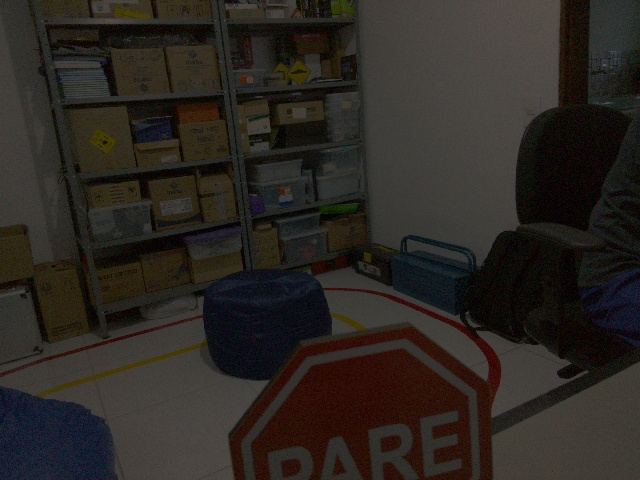

finish


In [11]:
upbutton = widgets.Button(description='yes')
downbutton = widgets.Button(description='no')
shootbutton = widgets.Button(description='img shoot')
out = widgets.Output()


count = [0]

def up_button_cliked(_, incr=1):
    with out:
        
        display.clear_output(wait=True)
        count[0] += incr
        samp_text = str(incr) + 'count' + str(count)
        print(samp_text,'yes')
        
upbutton.on_click(up_button_cliked)
    
def down_button_clicked(_,incr=-1):
    with out:
        display.clear_output(wait=True)
        count[0] += incr
        samp_text = str(incr) + 'count' + str(count)
        print(samp_text,'no')

downbutton.on_click(down_button_clicked)

def cap_video(video_index):
    try:
        cap = cv2.VideoCapture(video_index)
    except:
        print("Cannot Open Device")
    ret, frame = cap.read()
    while not ret:
        ret, frame = cap.read()
        
    display.clear_output(wait=True)
    
    _,ret_array = cv2.imencode('.jpg', frame)
    img = display.Image(data=ret_array)
    display.display(HVbox)
    print('Is that image a pare sign?')
    display.display(img)        
    cap.release()
    print("finish")

    
def img_shoot_button(_,test=0):
    cap_video('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink')

shootbutton.on_click(img_shoot_button)

Hbox = widgets.HBox([shootbutton, upbutton, downbutton,out])
HVbox = widgets.VBox([Hbox])
display.display(HVbox)